In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
%matplotlib inline

In [7]:
# Model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))
optimizer = tf.keras.optimizers.SGD(learning_rate=0.002, momentum=0.8)
loss = tf.keras.losses.BinaryCrossentropy()
model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

## Question 1

```BinaryCrossentropy``` is the best loss function for our problem

## Question 2

In [8]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 175232)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                11214912  
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 11,215,873
Trainable params: 11,215,873
Non-trainable params: 0
_________________________________________________________________


In [10]:
train_gen = ImageDataGenerator(rescale=1./255)

train_ds = train_gen.flow_from_directory(
    "./data/train",
    target_size=(150, 150),
    batch_size=20,
    class_mode="binary",
    shuffle=True
)

Found 20000 images belonging to 2 classes.


In [11]:
train_ds.class_indices

{'cats': 0, 'dogs': 1}

In [12]:
val_gen = ImageDataGenerator(rescale=1./255)

val_ds = val_gen.flow_from_directory(
    "./data/validation",
    target_size=(150, 150),
    batch_size=20,
    class_mode="binary",
    shuffle=True
)

Found 5000 images belonging to 2 classes.


In [13]:
val_ds.class_indices

{'cats': 0, 'dogs': 1}

In [14]:
history = model.fit(
    train_ds,
    steps_per_epoch=100,
    epochs=10,
    validation_data=val_ds,
    validation_steps=50
)

Epoch 1/10
100/100 [==============================] - 64s 635ms/step - loss: 0.6982 - accuracy: 0.4980 - val_loss: 0.6868 - val_accuracy: 0.6000
Epoch 2/10
100/100 [==============================] - 34s 343ms/step - loss: 0.6873 - accuracy: 0.5390 - val_loss: 0.6794 - val_accuracy: 0.5500
Epoch 3/10
100/100 [==============================] - 32s 324ms/step - loss: 0.6832 - accuracy: 0.5610 - val_loss: 0.6728 - val_accuracy: 0.6060
Epoch 4/10
100/100 [==============================] - 29s 291ms/step - loss: 0.6734 - accuracy: 0.5860 - val_loss: 0.6674 - val_accuracy: 0.5760
Epoch 5/10
100/100 [==============================] - 29s 294ms/step - loss: 0.6672 - accuracy: 0.5940 - val_loss: 0.6560 - val_accuracy: 0.6150
Epoch 6/10
100/100 [==============================] - 33s 328ms/step - loss: 0.6640 - accuracy: 0.5800 - val_loss: 0.6537 - val_accuracy: 0.6170
Epoch 7/10
100/100 [==============================] - 30s 300ms/step - loss: 0.6614 - accuracy: 0.5900 - val_loss: 0.6535 - val_ac

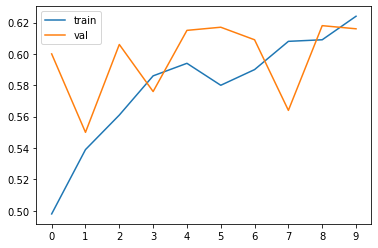

In [15]:
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="val")
plt.xticks(np.arange(10))
plt.legend()
plt.show()

## Question 3

In [16]:
np.median(history.history["accuracy"]).round(3)

0.588

## Question 4

In [17]:
np.std(history.history["loss"]).round(3)

0.017

In [18]:
train_gen_aug = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

train_ds_aug = train_gen_aug.flow_from_directory(
    "./data/train",
    target_size=(150, 150),
    batch_size=20,
    class_mode="binary",
    shuffle=True
)

Found 20000 images belonging to 2 classes.


In [19]:
history_aug = model.fit(
    train_ds_aug,
    steps_per_epoch=100,
    epochs=10,
    validation_data=val_ds,
    validation_steps=50
)

Epoch 1/10
100/100 [==============================] - 62s 619ms/step - loss: 0.6678 - accuracy: 0.5790 - val_loss: 0.6295 - val_accuracy: 0.6550
Epoch 2/10
100/100 [==============================] - 36s 361ms/step - loss: 0.6634 - accuracy: 0.5845 - val_loss: 0.6233 - val_accuracy: 0.6370
Epoch 3/10
100/100 [==============================] - 33s 333ms/step - loss: 0.6579 - accuracy: 0.5935 - val_loss: 0.6625 - val_accuracy: 0.5860
Epoch 4/10
100/100 [==============================] - 32s 323ms/step - loss: 0.6579 - accuracy: 0.5980 - val_loss: 0.6239 - val_accuracy: 0.6500
Epoch 5/10
100/100 [==============================] - 32s 316ms/step - loss: 0.6613 - accuracy: 0.5860 - val_loss: 0.6172 - val_accuracy: 0.6660
Epoch 6/10
100/100 [==============================] - 31s 314ms/step - loss: 0.6566 - accuracy: 0.5975 - val_loss: 0.6312 - val_accuracy: 0.6600
Epoch 7/10
100/100 [==============================] - 31s 307ms/step - loss: 0.6561 - accuracy: 0.6060 - val_loss: 0.6306 - val_ac

## Question 5

In [21]:
np.mean(history_aug.history["val_loss"]).round(3)

0.627

## Question 6

In [22]:
np.mean(history_aug.history["val_accuracy"][5:]).round(3)

0.644